<a href="https://colab.research.google.com/github/MithunKiniStar/AutoEncodersFaceSketch/blob/main/Deep_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, Conv2DTranspose, MaxPool2D, UpSampling2D, Dropout, Input
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re 
import keras
from keras import layers
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = '/content/photos'
img_array = []

sketch_path = '/content/sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))


for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    print("Image is ",image)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
  
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
    
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

In [3]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))
train_sketch_image = sketch_array[:1400]
train_image = img_array[:1400]
test_sketch_image = sketch_array[1400:]
test_image = img_array[1400:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Total number of sketch images: 1504
Total number of images: 1504
Train color image shape: (1400, 256, 256, 3)
Test color image shape (104, 256, 256, 3)


In [4]:
from keras import layers
input_img = keras.Input(shape=(256, 256, 3))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(3, activation='sigmoid')(decoded)

**Model for Photo To Sketch**

In [5]:
autoencoder = keras.Model(input_img, decoded)
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

Epoch 1/5
44/44 [==============================] - 13s 301ms/step - loss: 0.0888 - acc: 0.8103 - val_loss: 0.0856 - val_acc: 0.9366
Epoch 2/5
44/44 [==============================] - 13s 301ms/step - loss: 0.0861 - acc: 0.7028 - val_loss: 0.0847 - val_acc: 0.9055
Epoch 3/5
44/44 [==============================] - 13s 302ms/step - loss: 0.0845 - acc: 0.8300 - val_loss: 0.0835 - val_acc: 0.5878
Epoch 4/5
44/44 [==============================] - 13s 307ms/step - loss: 0.0831 - acc: 0.6774 - val_loss: 0.0833 - val_acc: 0.8801
Epoch 5/5
44/44 [==============================] - 13s 299ms/step - loss: 0.0827 - acc: 0.8017 - val_loss: 0.0821 - val_acc: 0.8899


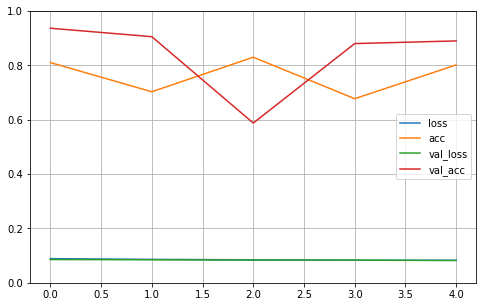

In [7]:
hist = autoencoder.fit(train_image, train_sketch_image,
                epochs=5,
                shuffle=True,
                validation_data=(test_image, test_sketch_image))


# plt.plot(hist.history["loss"]);
# plt.xlabel('Epochs');
# plt.ylabel('Training Error');
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

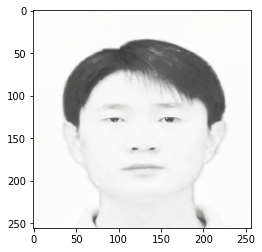

In [8]:
decoded_imgs = autoencoder.predict(test_image)
plt.imshow(decoded_imgs[0].reshape(256, 256, 3))

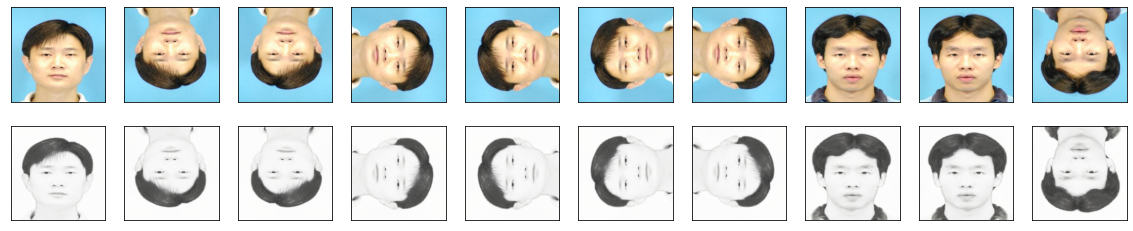

In [9]:
decoded_imgs = autoencoder.predict(test_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Model for Sketch to Photos**

Epoch 1/30
44/44 [==============================] - 14s 321ms/step - loss: 0.1693 - acc: 0.2587 - val_loss: 0.1406 - val_acc: 0.1454
Epoch 2/30
44/44 [==============================] - 13s 302ms/step - loss: 0.1527 - acc: 0.3562 - val_loss: 0.1388 - val_acc: 0.5123
Epoch 3/30
44/44 [==============================] - 13s 300ms/step - loss: 0.1503 - acc: 0.4400 - val_loss: 0.1336 - val_acc: 0.5418
Epoch 4/30
44/44 [==============================] - 13s 301ms/step - loss: 0.1474 - acc: 0.5463 - val_loss: 0.1301 - val_acc: 0.5967
Epoch 5/30
44/44 [==============================] - 13s 300ms/step - loss: 0.1450 - acc: 0.5909 - val_loss: 0.1258 - val_acc: 0.6316
Epoch 6/30
44/44 [==============================] - 13s 305ms/step - loss: 0.1440 - acc: 0.6031 - val_loss: 0.1249 - val_acc: 0.6540
Epoch 7/30
44/44 [==============================] - 13s 300ms/step - loss: 0.1421 - acc: 0.6249 - val_loss: 0.1227 - val_acc: 0.6693
Epoch 8/30
44/44 [==============================] - 13s 301ms/step - 

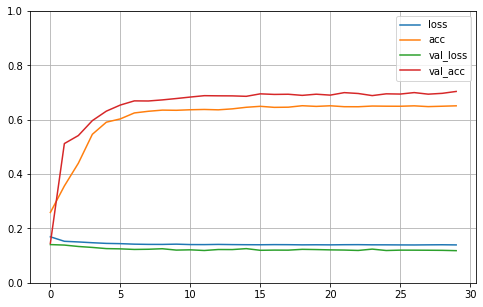

In [10]:
hist = autoencoder.fit( train_sketch_image, train_image,
                epochs=30,
                shuffle=True,
                validation_data=( test_sketch_image, test_image))


pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

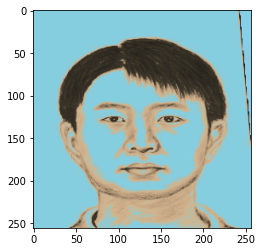

In [11]:
decoded_imgs = autoencoder.predict(test_sketch_image)
plt.imshow(decoded_imgs[0].reshape(256, 256, 3))

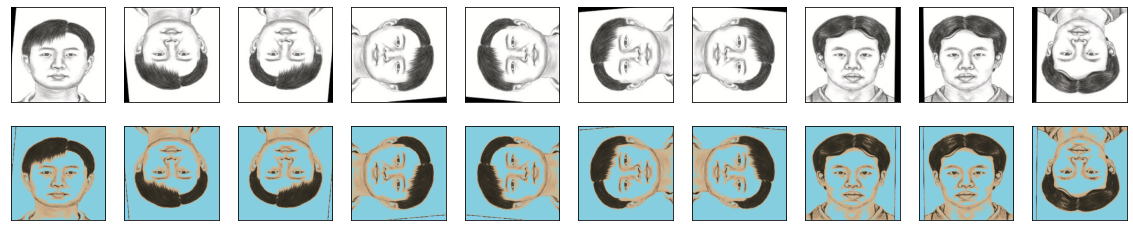

In [12]:
# Display for sketch to photos
decoded_imgs = autoencoder.predict(test_sketch_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_sketch_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()